In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
heart_dis=pd.read_csv("data/heart-disease.csv")
heart_dis.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
X=heart_dis.drop("target",axis=1)
y=heart_dis["target"]

In [5]:
np.random.seed(2)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8852459016393442

In [6]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_model(y_test, y_preds):
    accuracy=accuracy_score(y_test,y_preds)
    precision=precision_score(y_test,y_preds)
    recall=recall_score(y_test,y_preds)
    f1=f1_score(y_test,y_preds)
    
    metric_evaluation ={ "Accuracy ":accuracy,
                        "Precision":precision,
                        "Recall": recall,
                        "f1_score":f1}
    print(f" Accuracy : {accuracy*100:.2f}%")
    print(f" Precision : {precision:.2f}")
    print(f" Recall : {recall:.2f}")
    print(f" f1_score : {f1:.2f}")
    return metric_evaluation

In [8]:
np.random.seed(2)
from sklearn.ensemble import RandomForestClassifier
heart_dis_shuffled=heart_dis.sample(frac=1)
X=heart_dis_shuffled.drop("target",axis=1)
y=heart_dis_shuffled["target"]#shuffles all the rows and columns so as to split into train,test and validation set.
train_split=round(0.7*len(heart_dis_shuffled ))
valid_split=round(train_split+(0.15*len(heart_dis_shuffled)))

X_train,y_train=X[:train_split],y[:train_split]
X_valid,y_valid=X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test=X[valid_split:],y[valid_split:]
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_preds=clf.predict(X_valid)  #checking on validation data to evaluate and tune hyperparameters to imporve model.

baseline_metrics= evaluate_model(y_valid,y_preds)
baseline_metrics

 Accuracy : 77.78%
 Precision : 0.86
 Recall : 0.73
 f1_score : 0.79


{'Accuracy ': 0.7777777777777778,
 'Precision': 0.8636363636363636,
 'Recall': 0.7307692307692307,
 'f1_score': 0.7916666666666666}

In [9]:
np.random.seed(2)
clf_2=RandomForestClassifier(n_estimators=50)
clf_2.fit(X_train,y_train)
y_preds=clf_2.predict(X_valid)
clf_2_metrics=evaluate_model(y_valid,y_preds)
clf_2_metrics

 Accuracy : 80.00%
 Precision : 0.87
 Recall : 0.77
 f1_score : 0.82


{'Accuracy ': 0.8,
 'Precision': 0.8695652173913043,
 'Recall': 0.7692307692307693,
 'f1_score': 0.8163265306122449}

In [10]:
np.random.seed(2)
clf_3=RandomForestClassifier(n_estimators=50,
                             max_depth=11)
clf_3.fit(X_train,y_train)
y_preds=clf_3.predict(X_valid)
clf_3_metrics=evaluate_model(y_valid,y_preds)
clf_3_metrics

 Accuracy : 80.00%
 Precision : 0.87
 Recall : 0.77
 f1_score : 0.82


{'Accuracy ': 0.8,
 'Precision': 0.8695652173913043,
 'Recall': 0.7692307692307693,
 'f1_score': 0.8163265306122449}

In [11]:
np.random.seed(2)
from sklearn.model_selection import RandomizedSearchCV
grid={ "n_estimators": [10, 50, 100, 150, 200],
       "max_depth" : [None, 5, 10, 20 , 30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split" : [2, 4, 6],
       "min_samples_leaf" : [1, 2, 4]}
X=heart_dis_shuffled.drop("target",axis=1)
y=heart_dis_shuffled["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier(n_jobs=1)
rs_clf=RandomizedSearchCV(estimator=clf, #classifier
                          param_distributions=grid, #dictionary of hyperparameters with values
                          n_iter=10, #no. of models to be tried
                          cv=5, #5 fold cross validation
                          verbose=2)
rs_clf.fit(X_train,y_train)
y_preds=rs_clf.predict(X_test)
rs_clf_metrics=evaluate_model(y_test,y_preds)
rs_clf_metrics

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; tot

{'Accuracy ': 0.819672131147541,
 'Precision': 0.8285714285714286,
 'Recall': 0.8529411764705882,
 'f1_score': 0.8405797101449276}

In [12]:
rs_clf.best_params_

{'n_estimators': 50,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

In [13]:
np.random.seed(2)
grid_2={ "n_estimators": [10, 50, 100, 150, 200],
       "max_depth" : [None, 5, 10, 20 , 30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split" : [2, 4, 6],
       "min_samples_leaf" : [1, 2, 4]}
from sklearn.model_selection import GridSearchCV
X=heart_dis_shuffled.drop("target",axis=1)
y=heart_dis_shuffled["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier(n_jobs=1)
gs_clf=GridSearchCV(estimator=clf,
                    param_grid=grid_2,
                   cv=5,
                   verbose=2)
gs_clf.fit(X_train,y_train)
y_preds=gs_clf.predict(X_test)
gs_clf_metrics=evaluate_model(y_test,y_preds)
gs_clf_metrics

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_es

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=150; total time=   0.1s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_fe

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=None,

[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples

[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples

[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, mi

[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, mi

[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, mi

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, mi

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, mi

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, mi

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min

[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_s

[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto,

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt,

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, mi

[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, mi

[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, mi

[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, mi

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, mi

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, mi

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, mi

 Accuracy : 83.61%
 Precision : 0.83
 Recall : 0.88
 f1_score : 0.86


{'Accuracy ': 0.8360655737704918,
 'Precision': 0.8333333333333334,
 'Recall': 0.8823529411764706,
 'f1_score': 0.8571428571428571}

In [14]:
baseline_metrics

{'Accuracy ': 0.7777777777777778,
 'Precision': 0.8636363636363636,
 'Recall': 0.7307692307692307,
 'f1_score': 0.7916666666666666}

In [15]:
gs_clf_metrics

{'Accuracy ': 0.8360655737704918,
 'Precision': 0.8333333333333334,
 'Recall': 0.8823529411764706,
 'f1_score': 0.8571428571428571}

<AxesSubplot:>

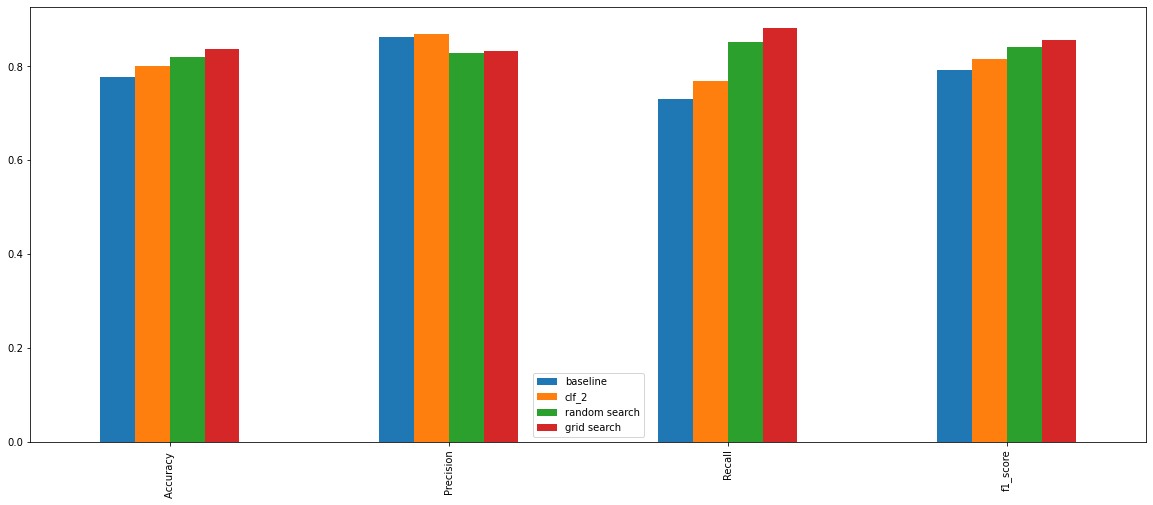

In [16]:
np.random.seed(2)
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_clf_metrics,
                                "grid search": gs_clf_metrics})
compare_metrics.plot.bar(figsize=(20,8))

In [17]:
compare_metrics

,baseline,clf_2,random search,grid search
Accuracy,0.777778,0.800000,0.819672,0.836066
Precision,0.863636,0.869565,0.828571,0.833333
Recall,0.730769,0.769231,0.852941,0.882353
f1_score,0.791667,0.816327,0.840580,0.857143


In [20]:
import pickle
pickle.dump(gs_clf,open("models/gs_randomforestclassifier_1.pkl","wb"))

In [21]:
loaded_model=pickle.load(open("models/gs_randomforestclassifier_1.pkl","rb"))

In [23]:
pickle_y_preds=loaded_model.predict(X_test)
model_metrics=evaluate_model(y_test,pickle_y_preds)

 Accuracy : 83.61%
 Precision : 0.83
 Recall : 0.88
 f1_score : 0.86
